In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/my-favorite-movies/IMDB_reviews.csv


In [2]:
import pandas as pd
import numpy as np 
import datetime as dt 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import ast
import pickle
from IPython.display import Image,display,HTML


plt.style.use('ggplot')
pd.options.display.max_columns=100

In [3]:
df=pd.read_csv(os.path.join(dirname, filename))

In [4]:
df

,URL,Title,Release Year,Poster,Genre,Director,Cast,Length,IMDB Rating,Metascore,Votes,Gross,Review Title,Review Text,Rating By User,Review Date,Review Author
0,https://www.imdb.com/title/tt0137523/?ref_=ttl...,Fight Club,1999,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Drama,David Fincher,"['Brad Pitt', 'Edward Norton', 'Meat Loaf']",2h 19m,8.8,67.0,"2,267,031",$37.03M,A great movie you can watch again and again,Because you'll probably be confused the first ...,10/10,11 February 2020,Pukeonthestreet
1,https://www.imdb.com/title/tt0137523/?ref_=ttl...,Fight Club,1999,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Drama,David Fincher,"['Brad Pitt', 'Edward Norton', 'Meat Loaf']",2h 19m,8.8,67.0,"2,267,031",$37.03M,Superb,"Superb, and truly one of the greatest movies o...",10/10,19 April 2014,grantss
2,https://www.imdb.com/title/tt0137523/?ref_=ttl...,Fight Club,1999,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Drama,David Fincher,"['Brad Pitt', 'Edward Norton', 'Meat Loaf']",2h 19m,8.8,67.0,"2,267,031",$37.03M,"Crazy, Cult, Plot Twist, Awesome = Fight Club",I have no words about this film. This is maste...,10/10,28 July 2021,jack_o_hasanov_imdb
3,https://www.imdb.com/title/tt0137523/?ref_=ttl...,Fight Club,1999,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Drama,David Fincher,"['Brad Pitt', 'Edward Norton', 'Meat Loaf']",2h 19m,8.8,67.0,"2,267,031",$37.03M,Welcome to movie heaven!,"Let's ignore the advice and talk about ""Fight ...",10/10,16 December 2013,gogoschka-1
4,https://www.imdb.com/title/tt0137523/?ref_=ttl...,Fight Club,1999,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Drama,David Fincher,"['Brad Pitt', 'Edward Norton', 'Meat Loaf']",2h 19m,8.8,67.0,"2,267,031",$37.03M,Crazy good,"So rewatchable. The acting is amazing, the sto...",10/10,12 October 2019,trosati-98923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76388,https://www.imdb.com/title/tt0056687/?ref_=ttl...,What Ever Happened to Baby Jane,1962,https://m.media-amazon.com/images/M/MV5BZmI0M2...,"Drama, Horror, Thriller",Robert Aldrich,"['Bette Davis', 'Joan Crawford', 'Victor Buono']",2h 14m,8.0,75.0,"60,552",$4.05M,the two rivals,what ever happened to baby jane was a good ...,NaN,29 September 2001,BETTEDAVISFAN
76389,https://www.imdb.com/title/tt0056687/?ref_=ttl...,What Ever Happened to Baby Jane,1962,https://m.media-amazon.com/images/M/MV5BZmI0M2...,"Drama, Horror, Thriller",Robert Aldrich,"['Bette Davis', 'Joan Crawford', 'Victor Buono']",2h 14m,8.0,75.0,"60,552",$4.05M,milestone film,"Great movie, even though it was filmed in b&w,...",10/10,13 January 2004,kelsodog2003
76390,https://www.imdb.com/title/tt0056687/?ref_=ttl...,What Ever Happened to Baby Jane,1962,https://m.media-amazon.com/images/M/MV5BZmI0M2...,"Drama, Horror, Thriller",Robert Aldrich,"['Bette Davis', 'Joan Crawford', 'Victor Buono']",2h 14m,8.0,75.0,"60,552",$4.05M,A classic that has worn not so well...,This is still a must see movie for Bette Davis...,6/10,22 July 2018,charliebeaglewoof
76391,https://www.imdb.com/title/tt0056687/?ref_=ttl...,What Ever Happened to Baby Jane,1962,https://m.media-amazon.com/images/M/MV5BZmI0M2...,"Drama, Horror, Thriller",Robert Aldrich,"['Bette Davis', 'Joan Crawford', 'Victor Buono']",2h 14m,8.0,75.0,"60,552",$4.05M,Whatever Happened To Baby Jane (1962),I love this movie great character work by Craw...,10/10,18 August 2023,summerstager


### Data Cleaning

In [5]:
df['Director']=df['Director'].replace('sEthan CoenJoel Coen','Coen Brothers').replace('sJoel CoenEthan Coen','Coen Brothers')

In [6]:
df['Release Year']=df['Release Year'].apply(pd.to_numeric)

In [7]:
df['Length']=df['Length'].apply(lambda x:
                   int(x.split('h')[0])*60 +int(x.split(' ')[-1].replace('m','')) if isinstance(x,str) and 'm' in str(x) 
                   else int(x.split('h')[0])*60 if isinstance(x,str) else None 
)

In [8]:
def ast_(x):
    try:
        return ast.literal_eval(x)
    except:
        return None
    
df['Cast']=df['Cast'].apply(lambda x:ast_(x))

In [9]:
df['Votes']=df['Votes'].str.replace(',','').apply(pd.to_numeric,errors='coerce')

In [10]:
df['Gross']=df['Gross'].apply(lambda x:
                  float(x.replace('$','').replace('M',''))*10**6 if 'M' in str(x) else None
)


In [11]:
df['IMDB Rating']=pd.to_numeric(df['IMDB Rating'],errors='coerce')

In [12]:
df['Rating By User']=df['Rating By User'].apply(lambda x:int(x.split('/')[0]) if isinstance(x,str) else None)

In [13]:
df['Review Date']=pd.to_datetime(df['Review Date'],errors='coerce')

### Applying Sentimnet Scores

In [14]:
import nltk

from nltk.sentiment import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()

from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

from nltk.corpus import stopwords
stopwords=stopwords.words('english')

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [15]:
def comment_sentiment_scores(comment):
    comment_tokenized=nltk.word_tokenize(comment)
    comment_lower=[w.lower() for w in comment_tokenized]
    comment_lemmatized=[lemmatizer.lemmatize(w) for w in comment_lower]
    comment_filtered=[w for w in comment_lemmatized if w not in stopwords]
    final_comment=' '.join(comment_filtered)
    
    score=sia.polarity_scores(final_comment)
    return score

In [16]:
from spacy import load

nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('wordnet2022')
nlp = load('en_core_web_sm')

! cp -rf /usr/share/nltk_data/corpora/wordnet2022 /usr/share/nltk_data/corpora/wordnet # temp fix for lookup error.

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet2022 to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/wordnet2022.zip.


In [17]:
%%time

scores = []

for i,review in enumerate(df['Review Text']):
    if isinstance(review, str):
        scores.append(comment_sentiment_scores(review))
    else:
        scores.append(None)

    if (i + 1) % int(len(df['Review Text'])/100)==0:
        print(f"Progress: {i + 1}/{len(df['Review Text'])}",end='\r')

CPU times: user 10min 25s, sys: 576 ms, total: 10min 25s
Wall time: 10min 26s


In [18]:
df['Sentiment Score']=[score['compound'] if isinstance(score,dict) else None for score in scores]

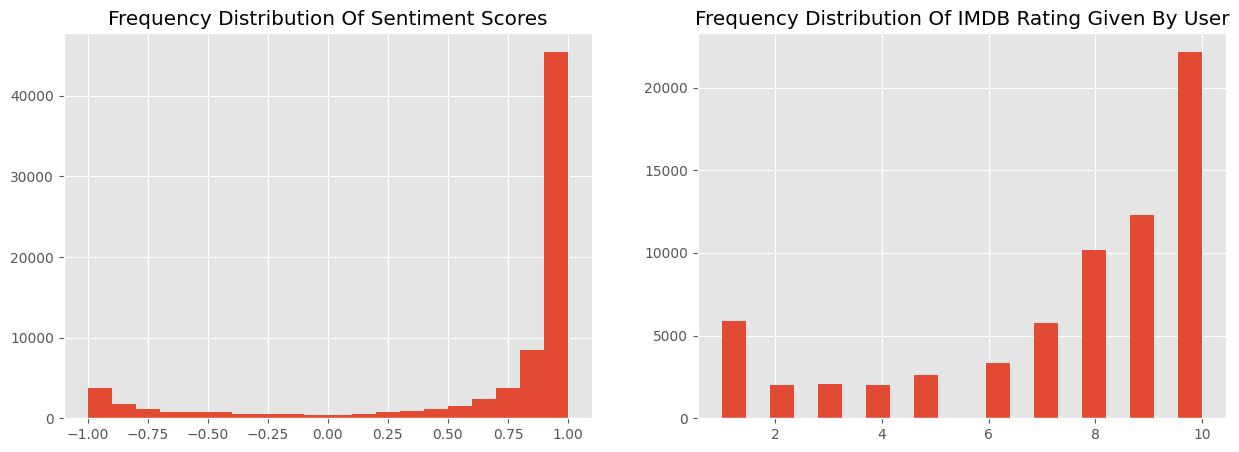

In [19]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

df['Sentiment Score'].hist(bins=20,ax=ax1)
ax1.set_title('Frequency Distribution Of Sentiment Scores')

df['Rating By User'].hist(bins=20,ax=ax2)
ax2.set_title('Frequency Distribution Of IMDB Rating Given By User')

plt.show()

In [20]:
g=df.groupby(['Poster','Title']).agg({'IMDB Rating':'mean','Sentiment Score':'mean'}).reset_index()
g=g.sort_values('Sentiment Score',ascending=False)
g['Poster'] = g.apply(lambda x: f'<img src="{x["Poster"]}" style="max-height:300px;max-width:300px;">', axis=1)
g=g.style.background_gradient(subset=['IMDB Rating','Sentiment Score'],cmap='Reds')
display(HTML(g.to_html(escape=False)))

#movies sorted by Sentiment Score in Descending order

,Poster,Title,IMDB Rating,Sentiment Score
35,,Moneyball,7.600000,0.917021
83,,Nebraska,7.700000,0.898761
3,,Ferris Bueller's Day Off,7.800000,0.888012
89,,Palm Springs,7.400000,0.883759
36,,The King of Comedy,7.800000,0.881998
63,,Chungking Express,8.000000,0.878549
41,,"O Brother, Where Art Thou?",7.700000,0.877651
78,,Gattaca,7.700000,0.873466
24,,Little Miss Sunshine,7.800000,0.868793
19,,Ex Machina,7.700000,0.868226


In [21]:
# For me:

# Cool Hand Luke
# Paris, Texas
# No Country For Old Men
# Fight Club
# Chungking Express
# Mulholland Drive
# Blue Velvet
# Nebraska
#...